In [10]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = datasets.load_iris()

In [11]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
X = pd


In [13]:
df = pd.DataFrame(X)
df.columns = iris['feature_names']
df['target'] = iris['target']
df.shape

(150, 5)

In [26]:
df = pd.read_csv(r"C:\Users\asunday\Downloads\iris - dataset - assignment.csv")

In [27]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [29]:
data2 = df.drop('target', axis =1)

In [30]:
cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data2 = scaler.fit_transform(data2)

data2 = pd.DataFrame(data2, columns=cols)
data2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [31]:
wcss = []


for k in range(1,11):
    Kmeans = KMeans(n_clusters=k, init = 'k-means++', random_state = 42)
    Kmeans.fit(data2)
    wcss.append(Kmeans.inertia_)

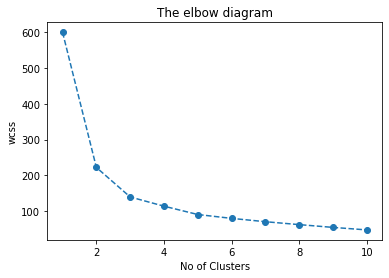

In [32]:
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The elbow diagram')
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

In [33]:
Kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state = 42)
y_means = Kmeans.fit_predict(data2)

y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [34]:
data2['K-means predicted cluster'] = y_means

data2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),K-means predicted cluster
0,-0.900681,1.019004,-1.340227,-1.315444,1
1,-1.143017,-0.131979,-1.340227,-1.315444,1
2,-1.385353,0.328414,-1.397064,-1.315444,1
3,-1.506521,0.098217,-1.283389,-1.315444,1
4,-1.021849,1.249201,-1.340227,-1.315444,1


In [35]:
data2.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'K-means predicted cluster'],
      dtype='object')

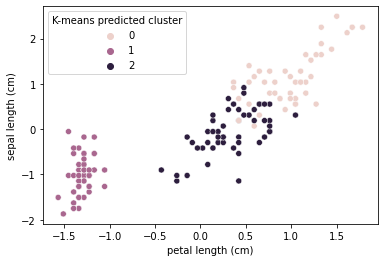

In [36]:
import seaborn as sns
# sns.scatterplot( data=data2, x='sepal length (cm)', y='sepal width (cm)', hue='K-means predicted cluster')
sns.scatterplot( data=data2, x='petal length (cm)', y='sepal length (cm)', hue='K-means predicted cluster')
plt.show()

In [37]:
import plotly.express as px
# plot the clusters using a 3D scatter plot in Plotly
fig = px.scatter_3d(data2, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)', color='K-means predicted cluster')
fig.show()